In [1]:
from clean_photometry import *

In [2]:
# Read all data
input_data,output_data  = read_data(filename='10_10_phot.txt',
                                    filters=filters)

In [3]:
'''
Prepare the data for classification. The output data is now cleaned 
to exclude low information entries and also labeled based on location 
of detection.

Return 3 arrays ordered by corresponding filternames:
- First array for input data in pandas data frames
- Second array for cleaned output data in pandas data frames
- Third array for labels of output data in numpy arrays
'''
in_DF,out_DF,out_LAB    = prep_data(input_data,output_data)

In [4]:
# Initiate classifier
clf = DecisionTreeClassifier(max_depth=4,
                             min_samples_split=50,
                             min_samples_leaf=10)

In [5]:
# Ensemble tree classifiers to try
'''
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

clf1 = RandomForestClassifier(n_estimators=100,n_jobs=-1,
      max_depth=10,min_samples_split=200, min_samples_leaf=100)
      
clf2 = AdaBoostClassifier(base_estimator=clf,
                        n_estimators=50,
                        random_state=int(np.ceil(time.time())))
'''

'\nfrom sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier\n\nclf1 = RandomForestClassifier(n_estimators=100,n_jobs=-1,\n      max_depth=10,min_samples_split=200, min_samples_leaf=100)\n      \nclf2 = AdaBoostClassifier(base_estimator=clf,\n                        n_estimators=50,\n                        random_state=int(np.ceil(time.time())))\n'

In [6]:
# Example for 1 filter

# Extract features and label
features = out_DF[0][feature_names]
labels   = out_LAB[0]
filt = filters[0]

# Split into training and testing datasets
train_F,test_F,train_L,test_L = train_test_split(features,labels,test_size=0.9)

# Train and predict
clf.fit(train_F,train_L)
pred_L = clf.predict(test_F)

# Evaluate the model
print_report(filt,test_L,pred_L,feature_names,
             clf.feature_importances_)


Band Z087 feature importance:
err:	0.670
SNR:	0.091
Sharpness:	0.006
Crowding:	0.233

 Precision:	0.78
 Recall:	0.71 (Sensitivity)
 Specificity:	0.89





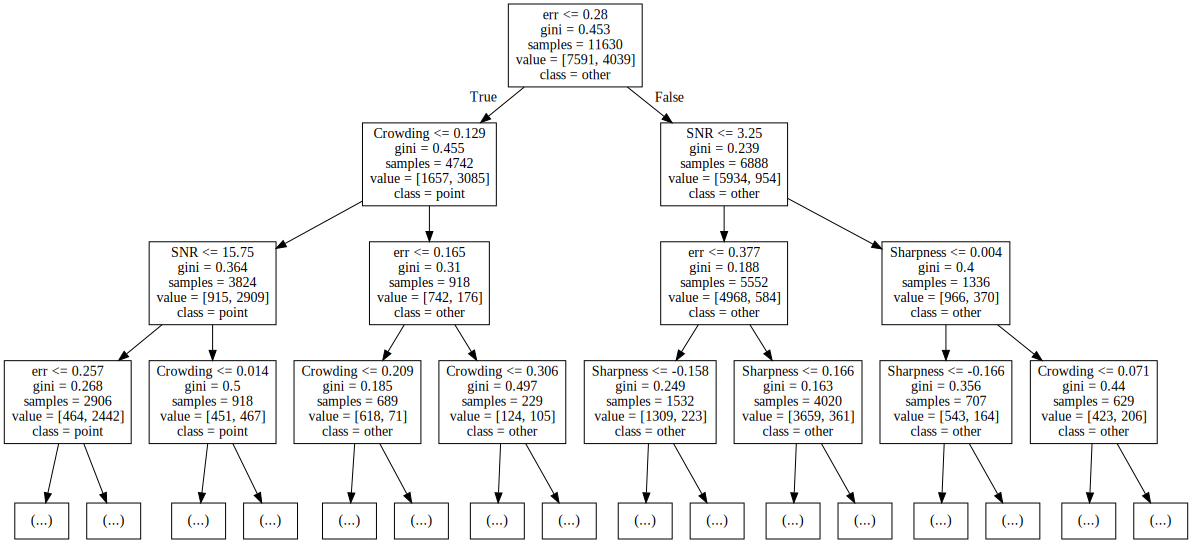

In [7]:
# Ensure that the "tree" is reasonable
dot_data = export_graphviz(clf, out_file=None,
                           leaves_parallel=True,
                           feature_names=feature_names,
                           class_names=['other','point'],
                           max_depth=3)
graph = graphviz.Source(dot_data)
graph

In [8]:
# Relabel the data for qualitative evaluation
_new_labels = clf.predict(features)

In [9]:
# For all filters
new_labels = classify(out_DF,out_LAB,
                      clf=clf,
                      test_size=0.9,
                      opt={'evaluate':False,
                           'summary':True,
                           'tree':False})


Band Z087 feature importance:
err:	0.708
SNR:	0.059
Sharpness:	0.004
Crowding:	0.229

 Precision:	0.76
 Recall:	0.74 (Sensitivity)
 Specificity:	0.88




Band Y106 feature importance:
err:	0.706
SNR:	0.032
Sharpness:	0.025
Crowding:	0.237

 Precision:	0.80
 Recall:	0.74 (Sensitivity)
 Specificity:	0.90




Band J129 feature importance:
err:	0.682
SNR:	0.000
Sharpness:	0.071
Crowding:	0.247

 Precision:	0.81
 Recall:	0.67 (Sensitivity)
 Specificity:	0.92




Band H158 feature importance:
err:	0.024
SNR:	0.596
Sharpness:	0.131
Crowding:	0.249

 Precision:	0.77
 Recall:	0.67 (Sensitivity)
 Specificity:	0.90




Band F184 feature importance:
err:	0.369
SNR:	0.044
Sharpness:	0.227
Crowding:	0.360

 Precision:	0.63
 Recall:	0.50 (Sensitivity)
 Specificity:	0.88






Filters Z087 and Y106:
Stars: 49578  Others: 11304
			 Writing out:  input_cmd_Z087_Y106_Vega.png


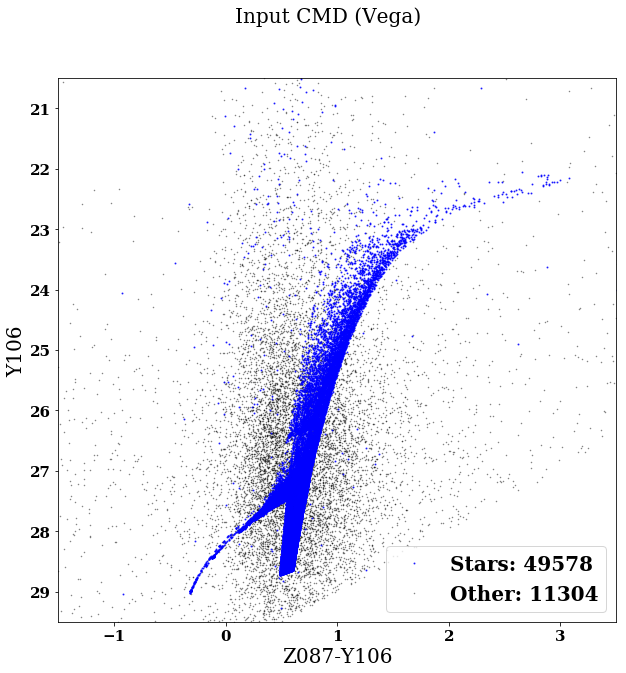

Stars: 37467  Others: 28068
			 Writing out:  output_cmd_Z087_Y106_full.png


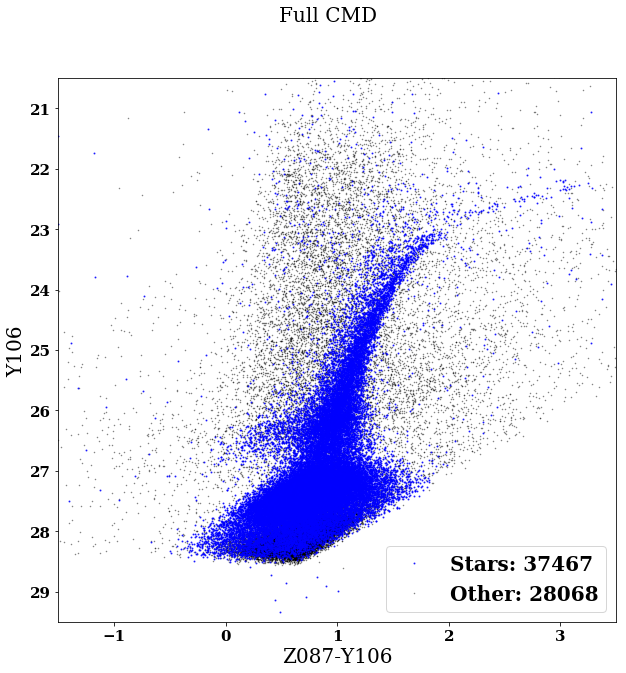

In [10]:
# Make figures for qualitative evaluation
# Example for one pair of filters

# Properly added in both filters
inPair   = input_pair(in_DF,0,1)

# Properly detected in both filters
outPair  = output_pair(out_DF,new_labels,0,1)

# Re-classify based on whether added and detected as stars
clnPair  = clean_pair(inPair,outPair)

# Show input and output data
make_plots(inPair,outPair,clnPair,\
           filt1=filters[0],filt2=filters[1],\
           opt=['input','output'],show_plot=True)


Filters Z087 and Y106:
Stars: 23262  Others: 2858
			 Writing out:  clean_cmd_Z087_Y106_clean.png


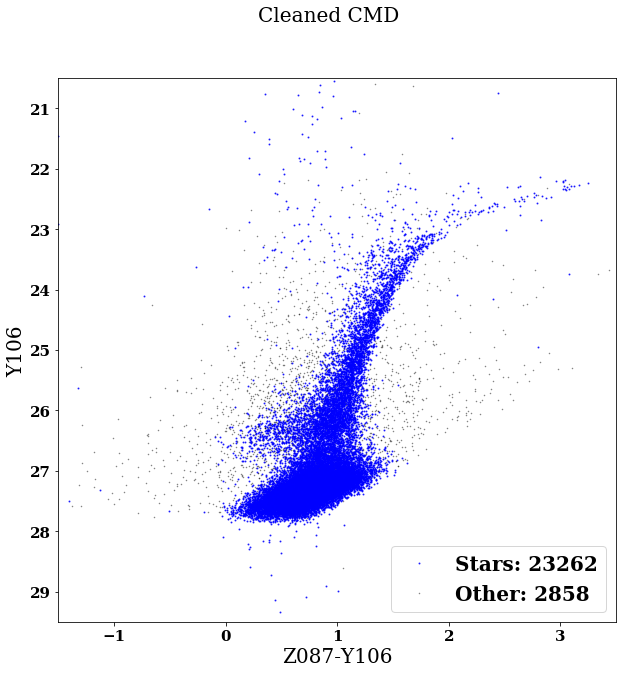

Recovery Rate:	 0.47
False Rate: 	 0.11





In [11]:
# Show re-labeled data, for qualitative evaluation
make_plots(inPair,outPair,clnPair,\
           filt1=filters[0],filt2=filters[1],\
           opt=['clean'],show_plot=True)

In [12]:
# Qualitative evaluation, for all filter pairs
makePlots(in_DF,out_DF,new_labels,show_plot=False)


Filters Z087 and Y106:
Stars: 49578  Others: 11271
			 Writing out:  input_cmd_Z087_Y106_Vega.png
Stars: 37703  Others: 27926
			 Writing out:  output_cmd_Z087_Y106_full.png
Stars: 25836  Others: 4009
			 Writing out:  clean_cmd_Z087_Y106_clean.png
Recovery Rate:	 0.52
False Rate: 	 0.13




Filters Z087 and J129:
Stars: 49578  Others: 11304
			 Writing out:  input_cmd_Z087_J129_Vega.png
Stars: 37467  Others: 28068
			 Writing out:  output_cmd_Z087_J129_full.png
Stars: 23262  Others: 2858
			 Writing out:  clean_cmd_Z087_J129_clean.png
Recovery Rate:	 0.47
False Rate: 	 0.11




Filters Z087 and H158:
Stars: 49579  Others: 11320
			 Writing out:  input_cmd_Z087_H158_Vega.png
Stars: 36749  Others: 28669
			 Writing out:  output_cmd_Z087_H158_full.png
Stars: 22963  Others: 2903
			 Writing out:  clean_cmd_Z087_H158_clean.png
Recovery Rate:	 0.46
False Rate: 	 0.11




Filters Z087 and F184:
Stars: 49579  Others: 11341
			 Writing out:  input_cmd_Z087_F184_Vega.png
Stars: 31665  Others: 


Filters Z087 and Y106:
Stars: 49578  Others: 11271
			 Writing out:  input_cmd_Z087_Y106_Vega.png


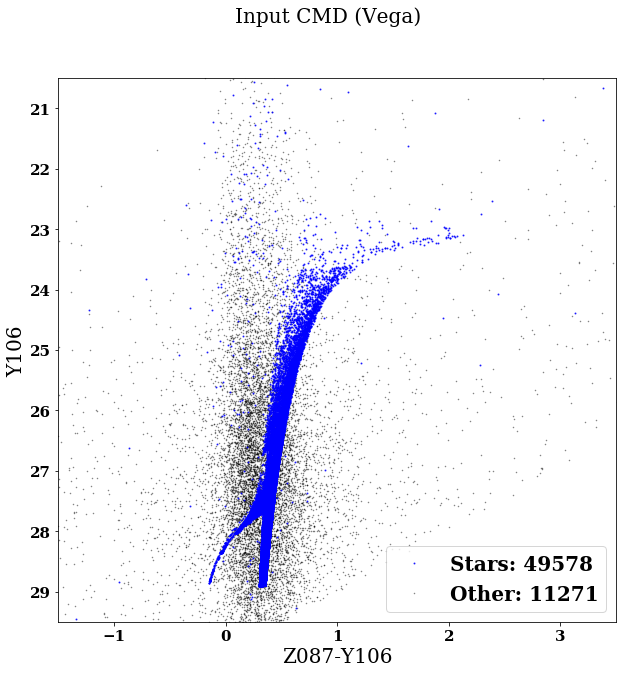

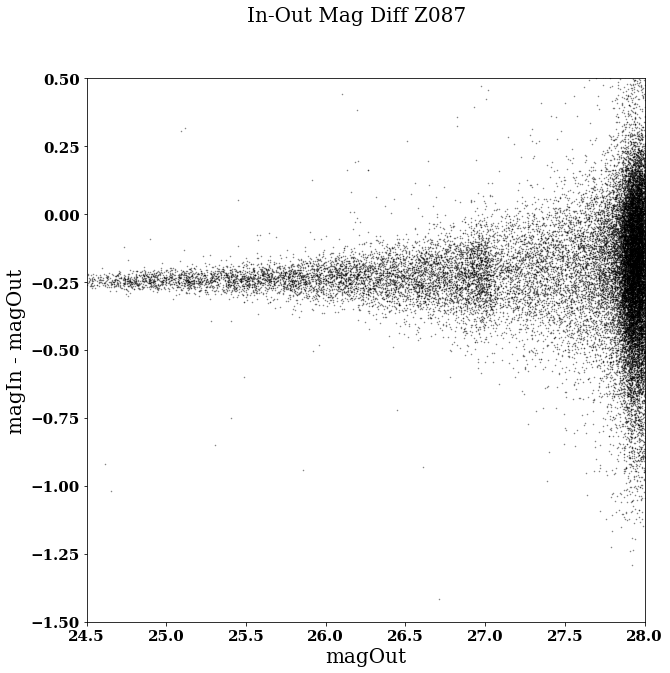

Stars: 37703  Others: 27926
			 Writing out:  output_cmd_Z087_Y106_full.png


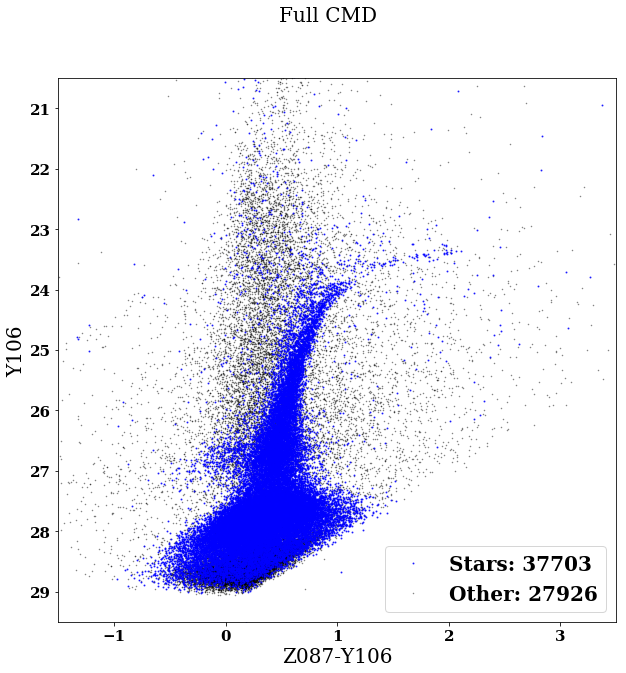

Stars: 25836  Others: 4009
			 Writing out:  clean_cmd_Z087_Y106_clean.png


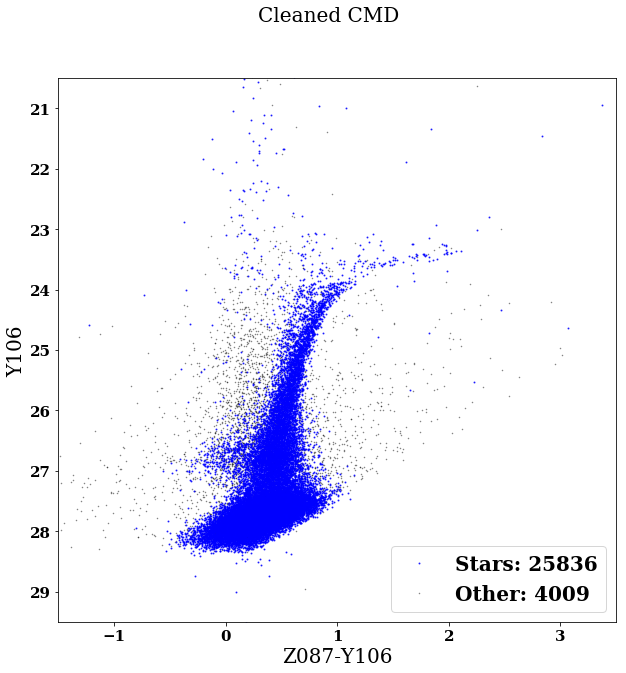

Recovery Rate:	 0.52
False Rate: 	 0.13




Filters Z087 and J129:
Stars: 49578  Others: 11304
			 Writing out:  input_cmd_Z087_J129_Vega.png


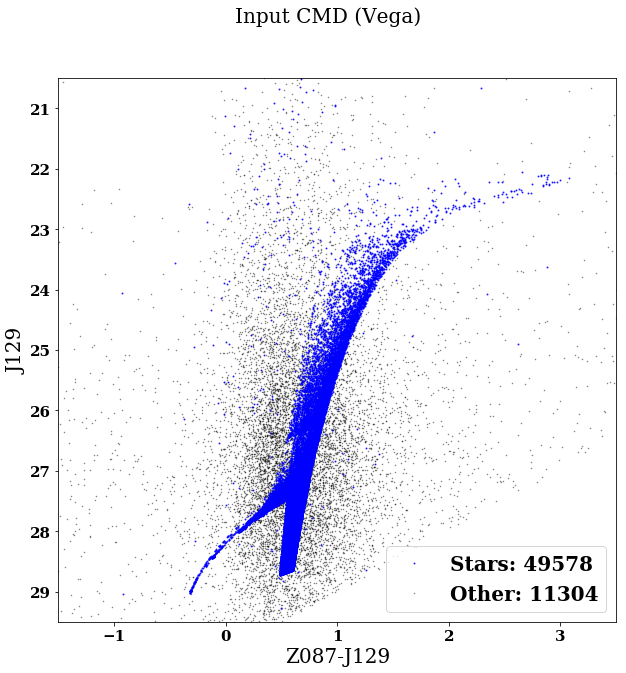

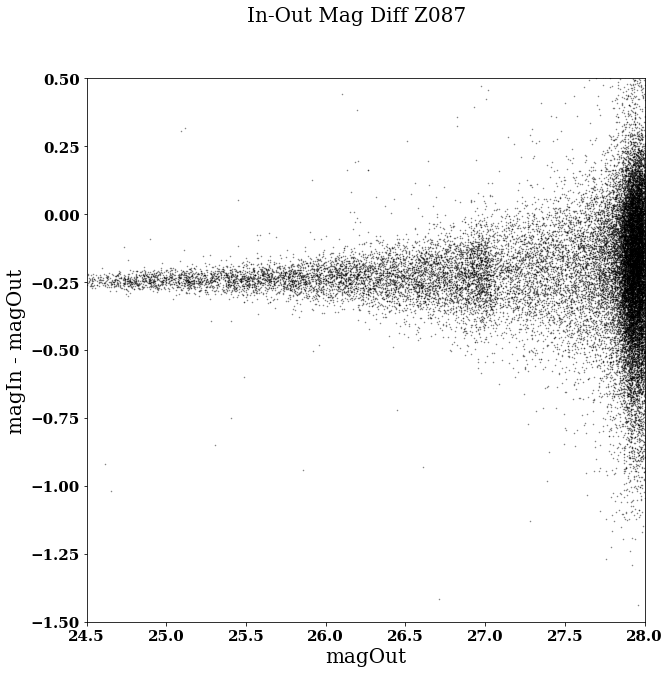

Stars: 37467  Others: 28068
			 Writing out:  output_cmd_Z087_J129_full.png


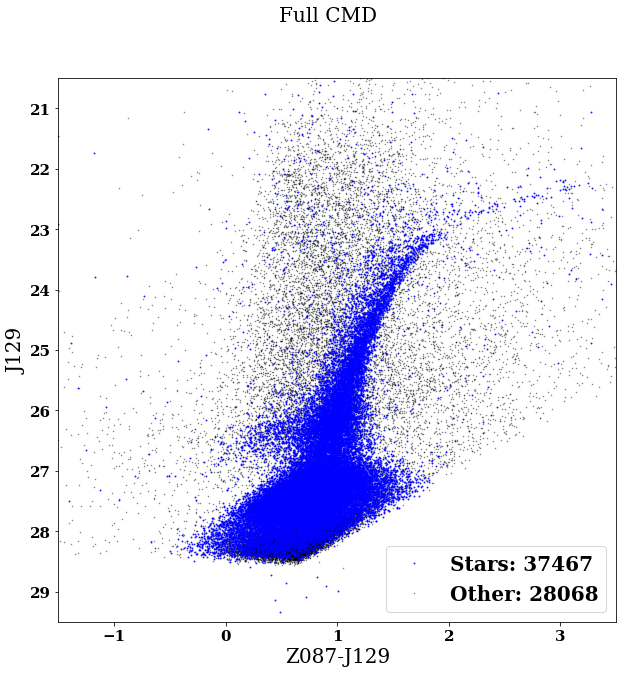

Stars: 23262  Others: 2858
			 Writing out:  clean_cmd_Z087_J129_clean.png


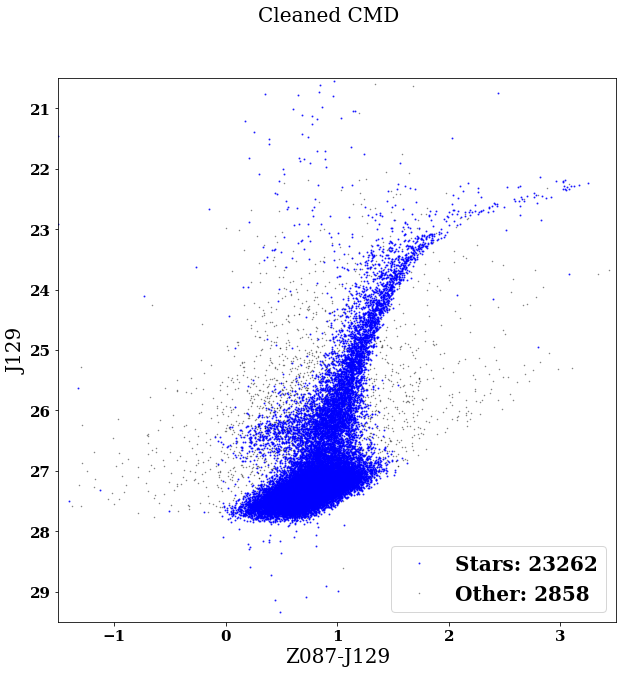

Recovery Rate:	 0.47
False Rate: 	 0.11




Filters Z087 and H158:
Stars: 49579  Others: 11320
			 Writing out:  input_cmd_Z087_H158_Vega.png


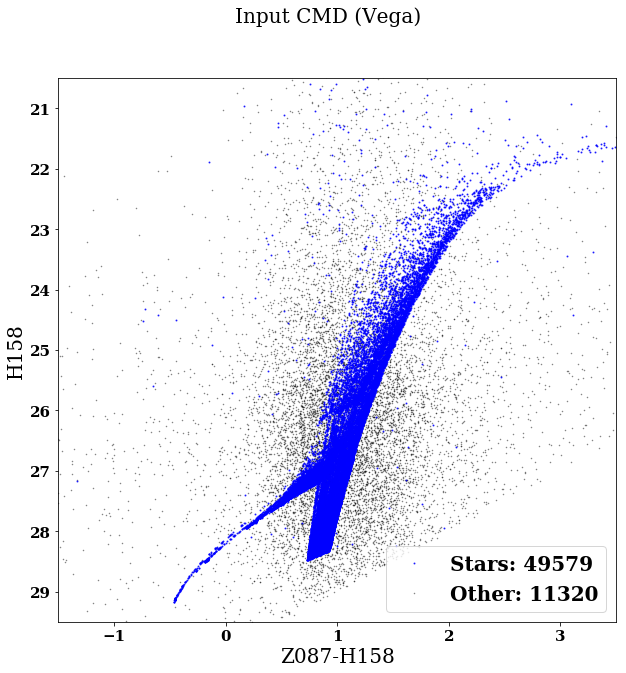

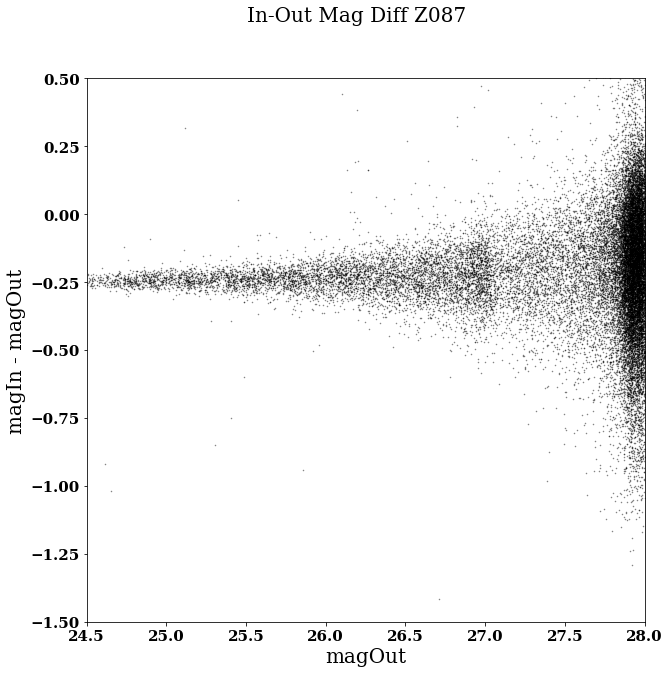

Stars: 36749  Others: 28669
			 Writing out:  output_cmd_Z087_H158_full.png


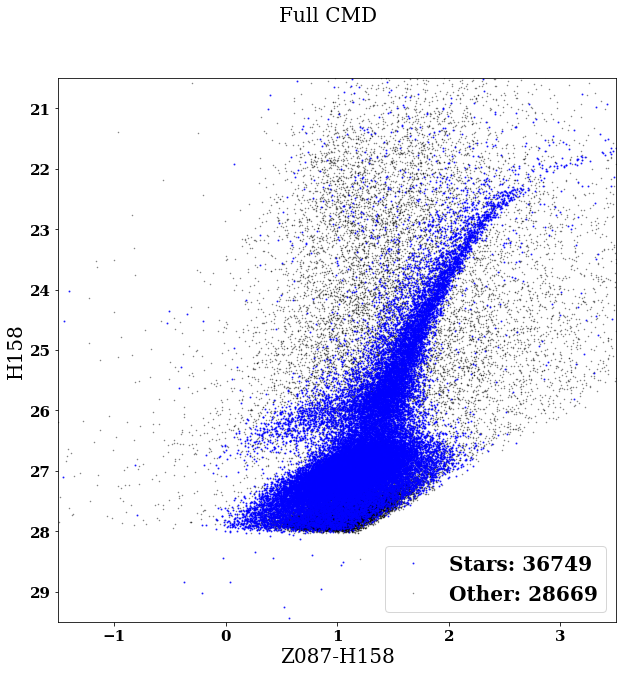

Stars: 22963  Others: 2903
			 Writing out:  clean_cmd_Z087_H158_clean.png


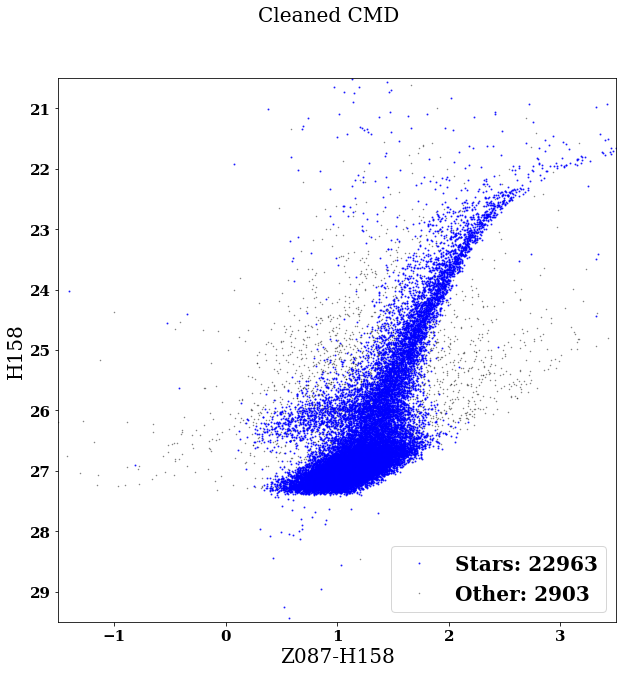

Recovery Rate:	 0.46
False Rate: 	 0.11




Filters Z087 and F184:
Stars: 49579  Others: 11341
			 Writing out:  input_cmd_Z087_F184_Vega.png


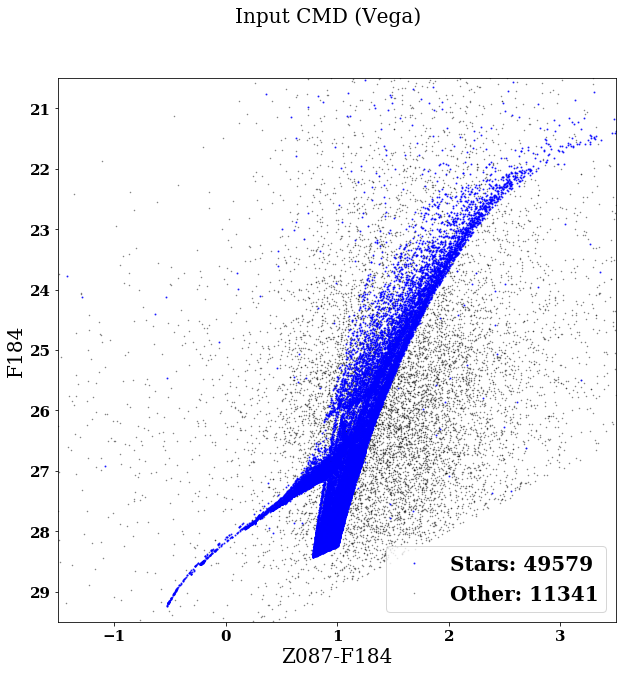

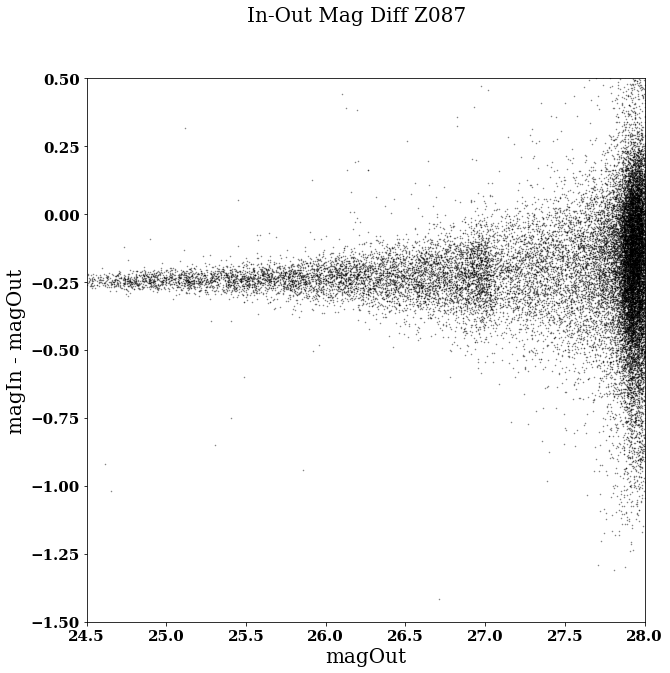

Stars: 31665  Others: 29460
			 Writing out:  output_cmd_Z087_F184_full.png


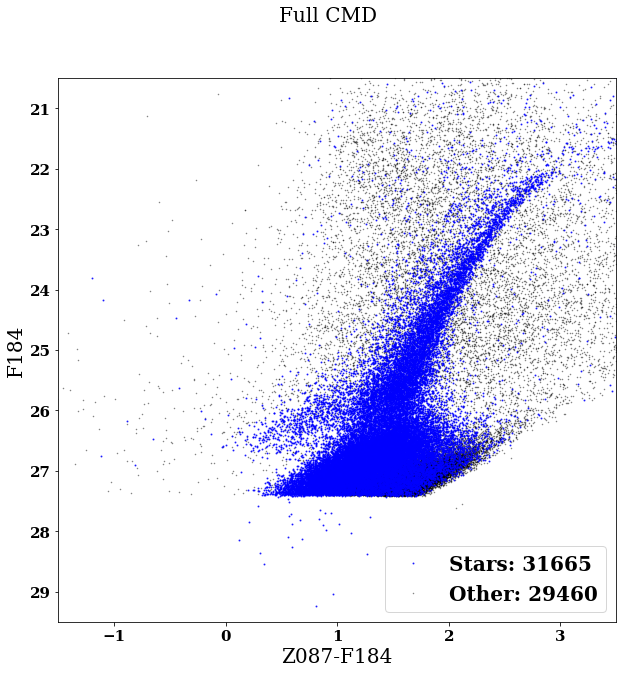

Stars: 15857  Others: 2644
			 Writing out:  clean_cmd_Z087_F184_clean.png


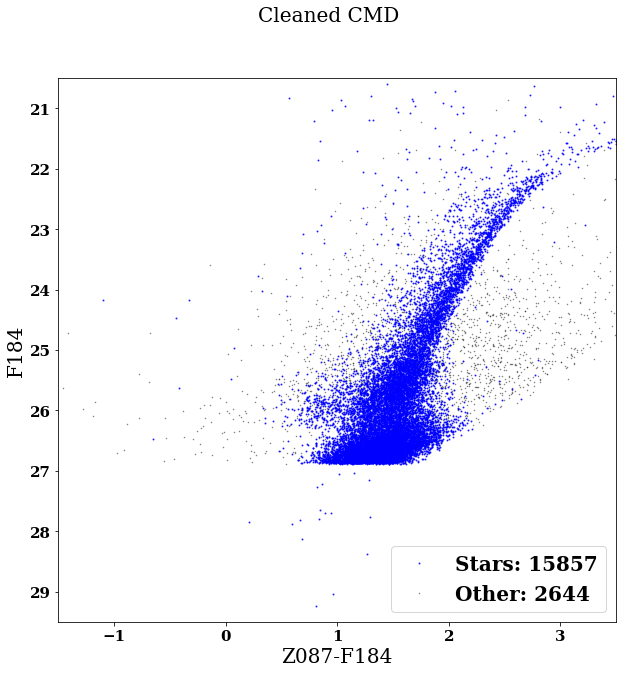

Recovery Rate:	 0.32
False Rate: 	 0.14




Filters Y106 and J129:
Stars: 49712  Others: 11724
			 Writing out:  input_cmd_Y106_J129_Vega.png


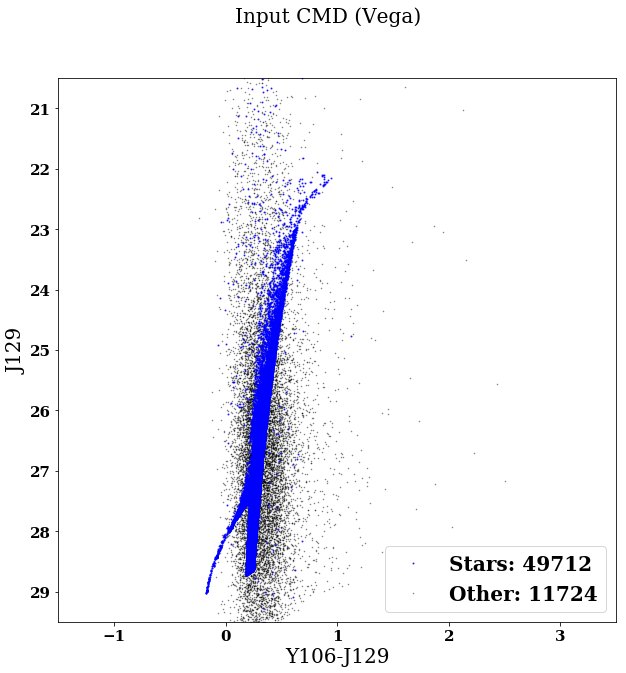

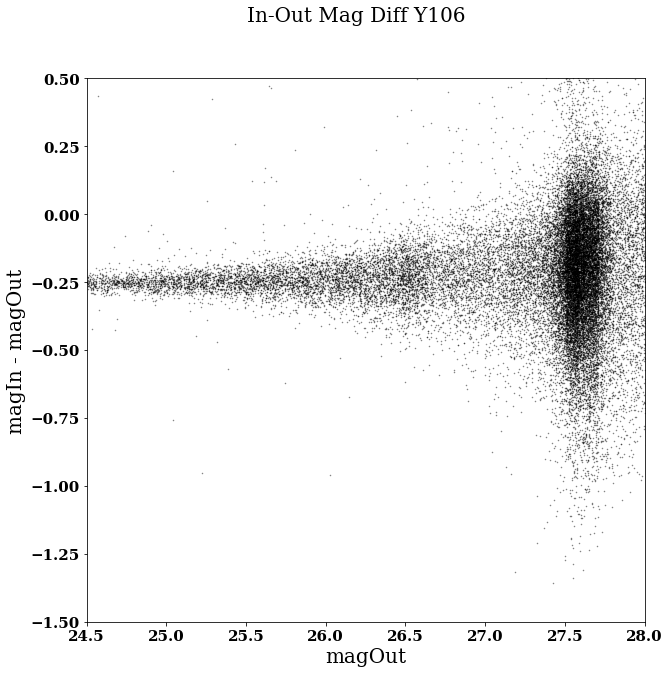

Stars: 38392  Others: 31249
			 Writing out:  output_cmd_Y106_J129_full.png


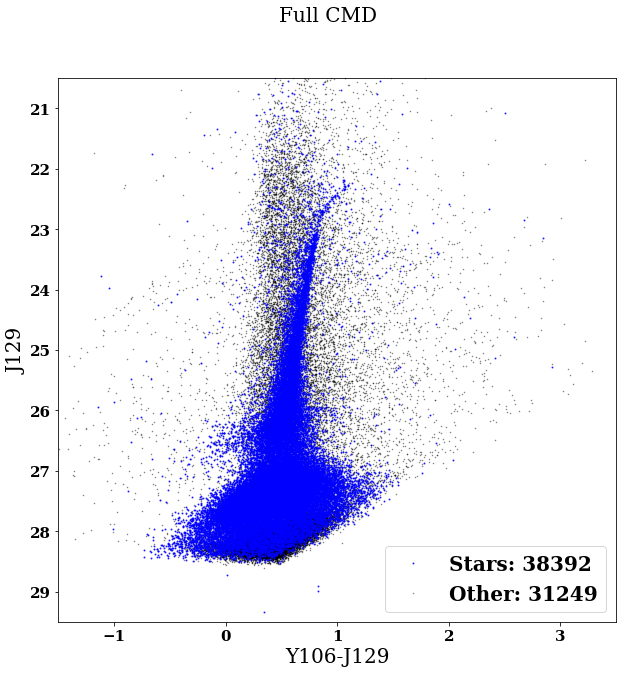

Stars: 24075  Others: 3221
			 Writing out:  clean_cmd_Y106_J129_clean.png


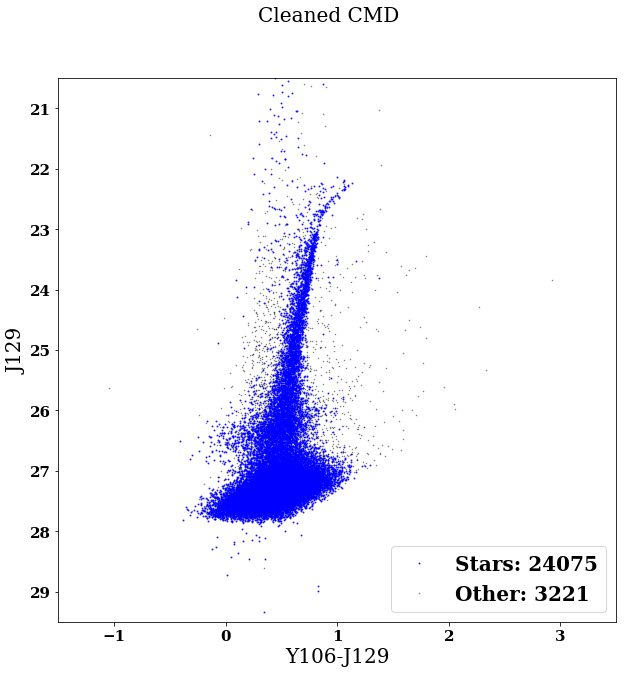

Recovery Rate:	 0.48
False Rate: 	 0.12




Filters Y106 and H158:
Stars: 49712  Others: 11633
			 Writing out:  input_cmd_Y106_H158_Vega.png


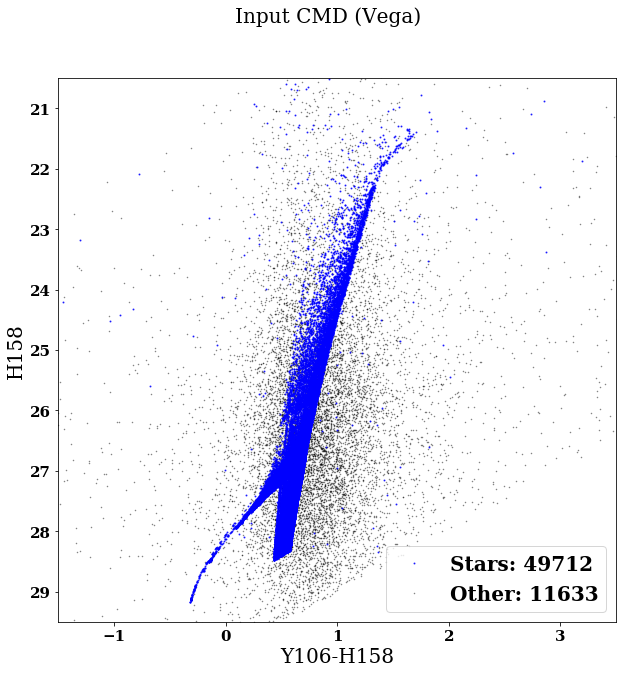

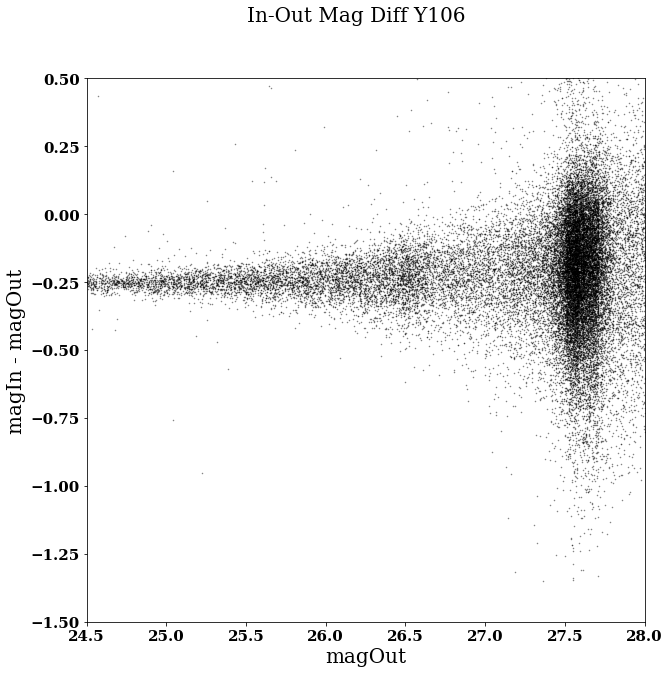

Stars: 37533  Others: 30565
			 Writing out:  output_cmd_Y106_H158_full.png


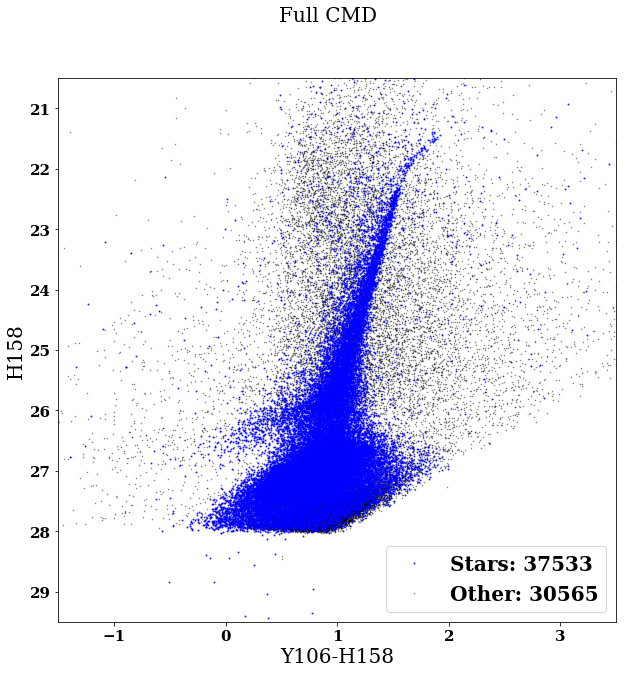

Stars: 23501  Others: 2988
			 Writing out:  clean_cmd_Y106_H158_clean.png


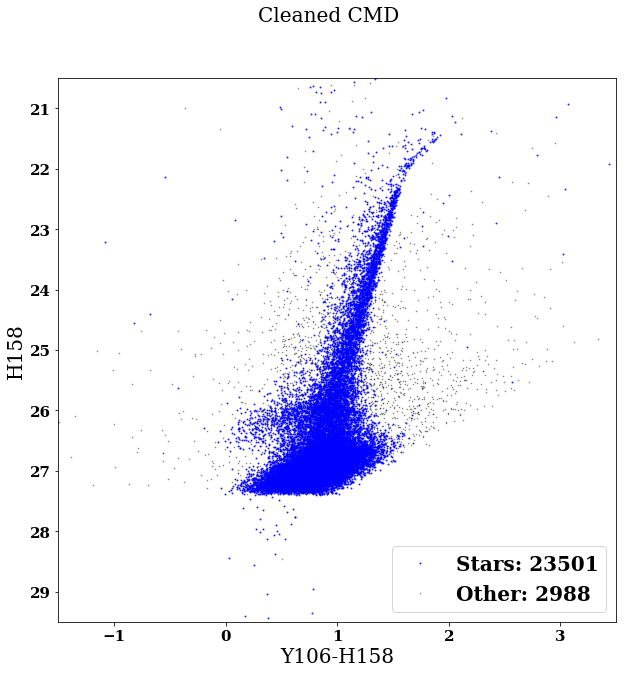

Recovery Rate:	 0.47
False Rate: 	 0.11




Filters Y106 and F184:
Stars: 49712  Others: 11648
			 Writing out:  input_cmd_Y106_F184_Vega.png


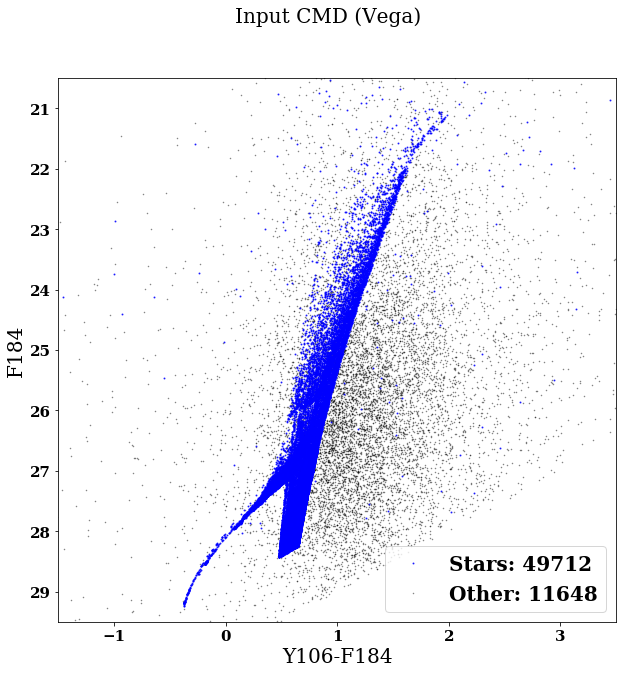

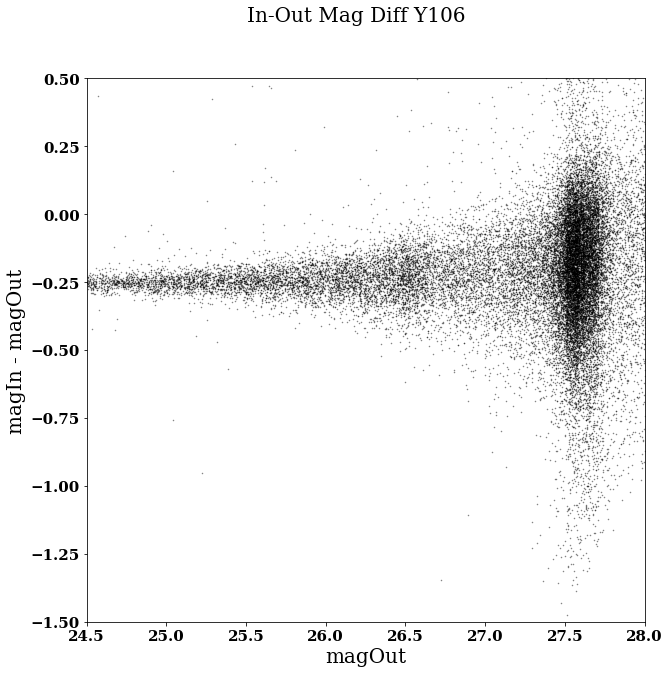

Stars: 32104  Others: 31915
			 Writing out:  output_cmd_Y106_F184_full.png


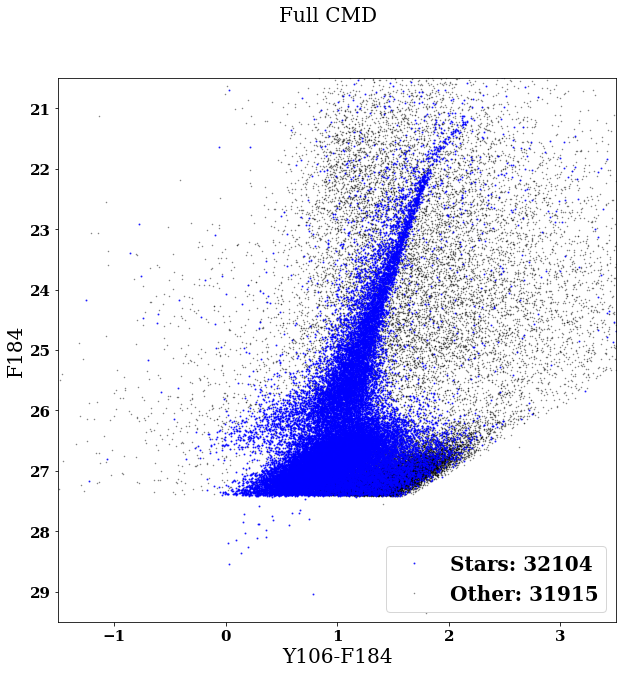

Stars: 15514  Others: 2610
			 Writing out:  clean_cmd_Y106_F184_clean.png


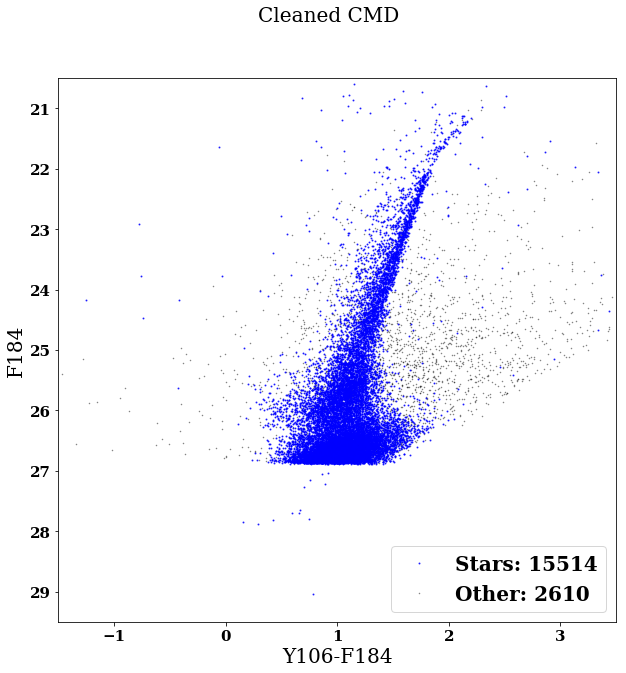

Recovery Rate:	 0.31
False Rate: 	 0.14




Filters J129 and H158:
Stars: 49902  Others: 11853
			 Writing out:  input_cmd_J129_H158_Vega.png


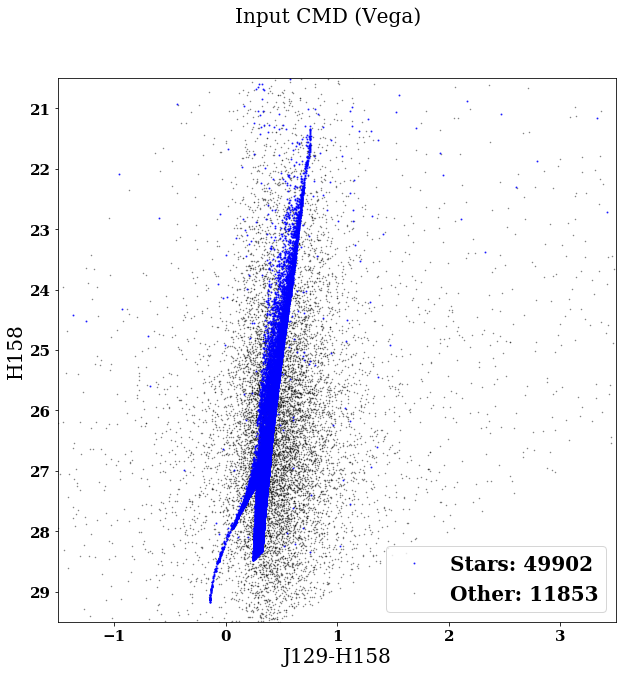

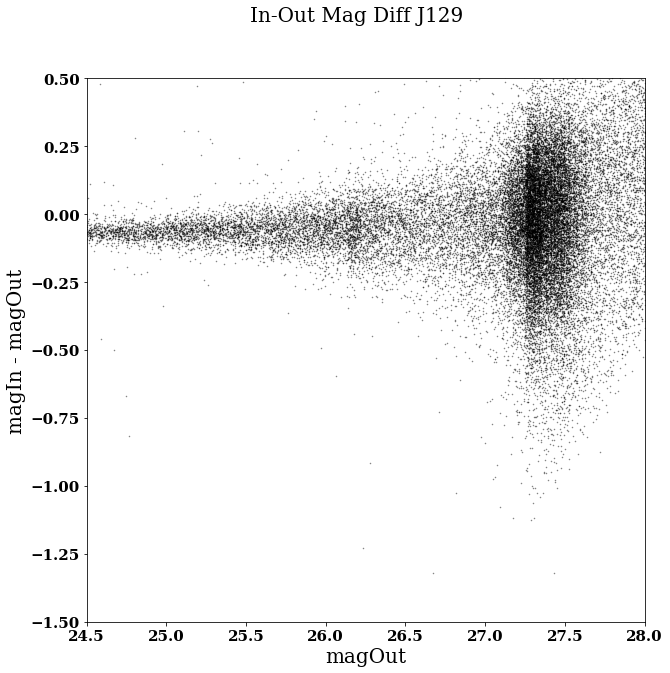

Stars: 37522  Others: 32686
			 Writing out:  output_cmd_J129_H158_full.png


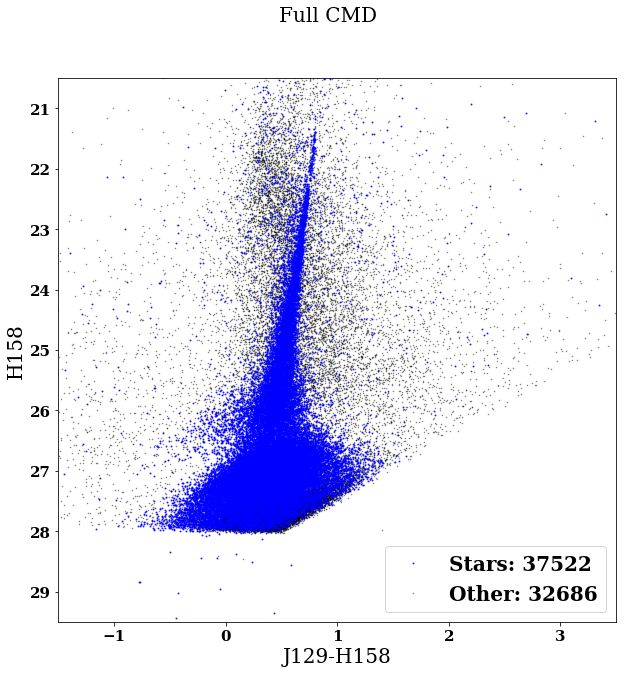

Stars: 21851  Others: 2905
			 Writing out:  clean_cmd_J129_H158_clean.png


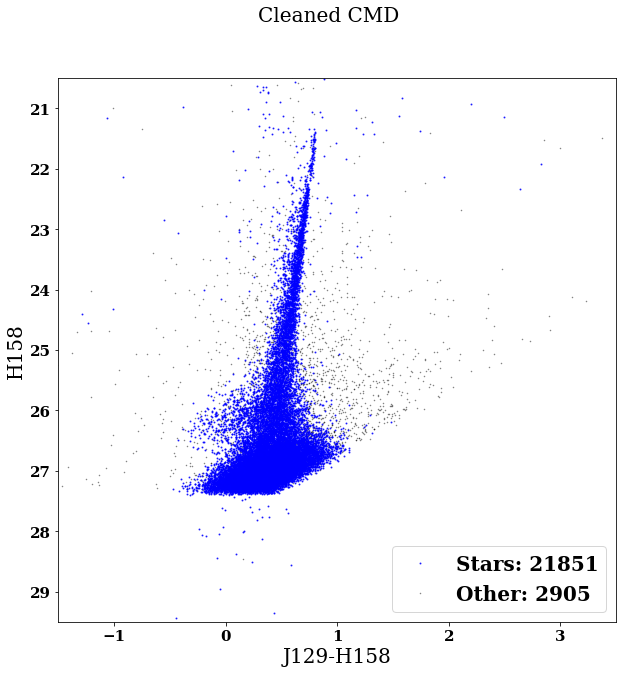

Recovery Rate:	 0.44
False Rate: 	 0.12




Filters J129 and F184:
Stars: 49902  Others: 11868
			 Writing out:  input_cmd_J129_F184_Vega.png


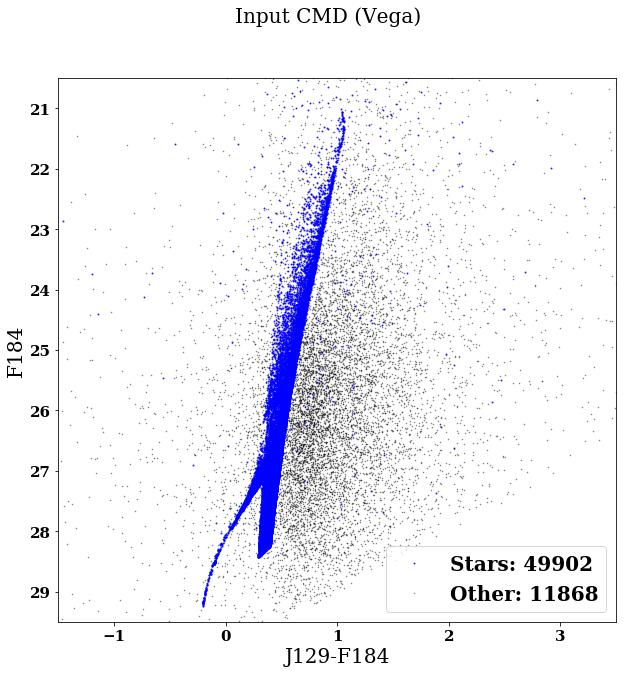

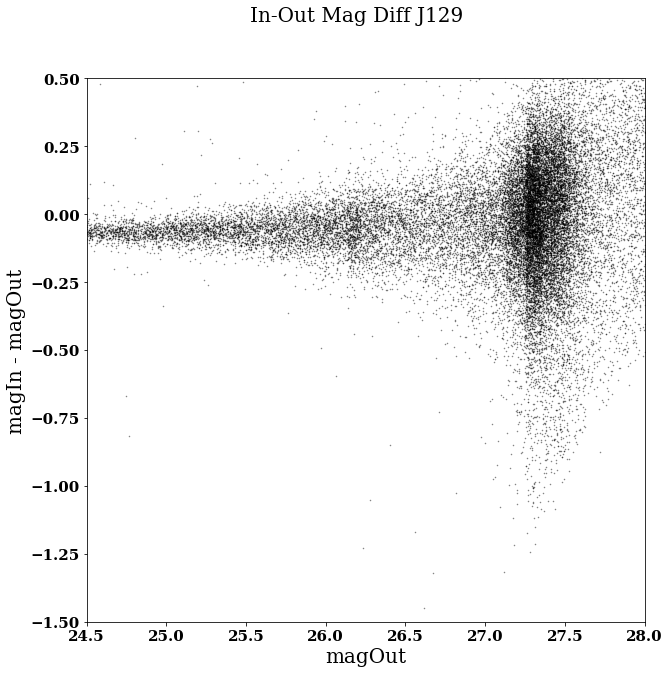

Stars: 32208  Others: 33871
			 Writing out:  output_cmd_J129_F184_full.png


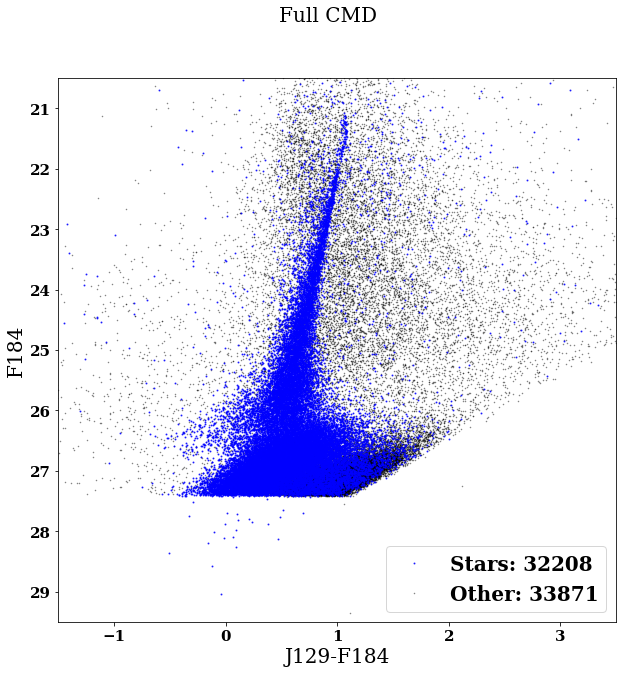

Stars: 13917  Others: 2205
			 Writing out:  clean_cmd_J129_F184_clean.png


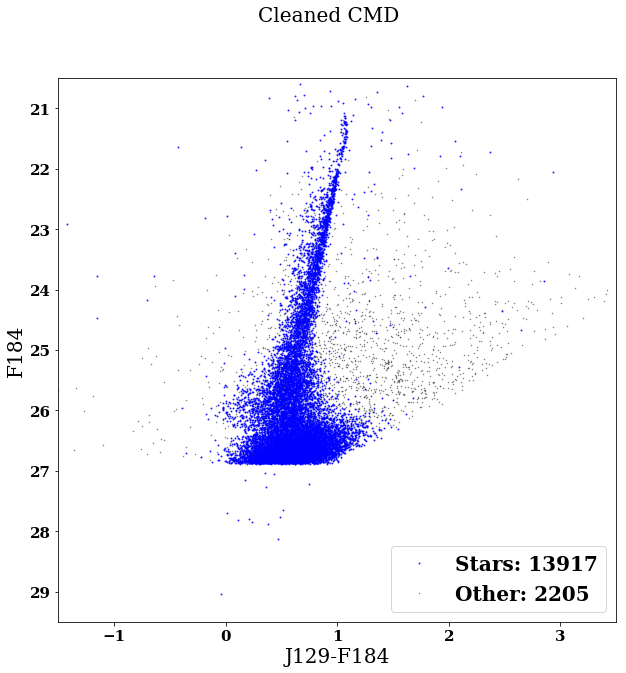

Recovery Rate:	 0.28
False Rate: 	 0.14




Filters H158 and F184:
Stars: 50088  Others: 12178
			 Writing out:  input_cmd_H158_F184_Vega.png


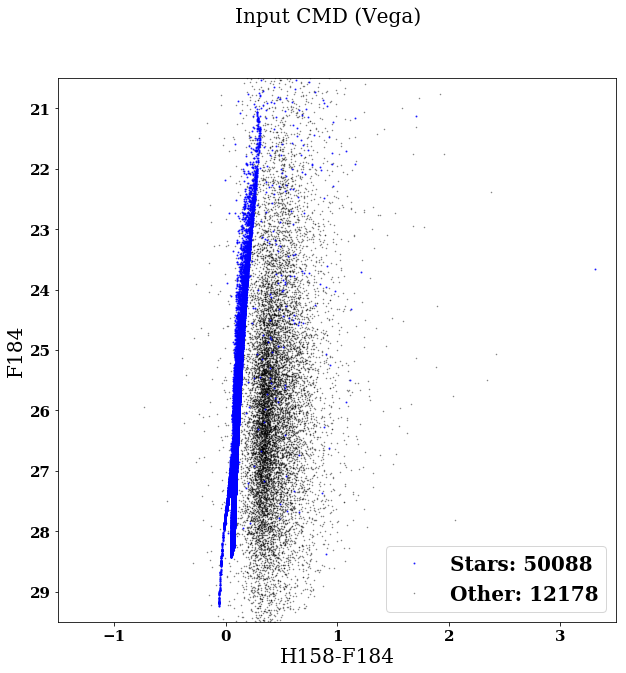

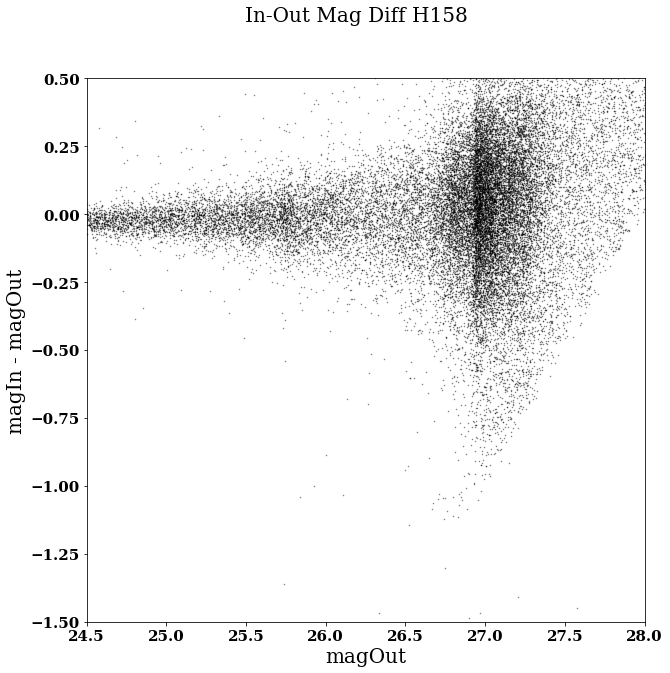

Stars: 32154  Others: 38342
			 Writing out:  output_cmd_H158_F184_full.png


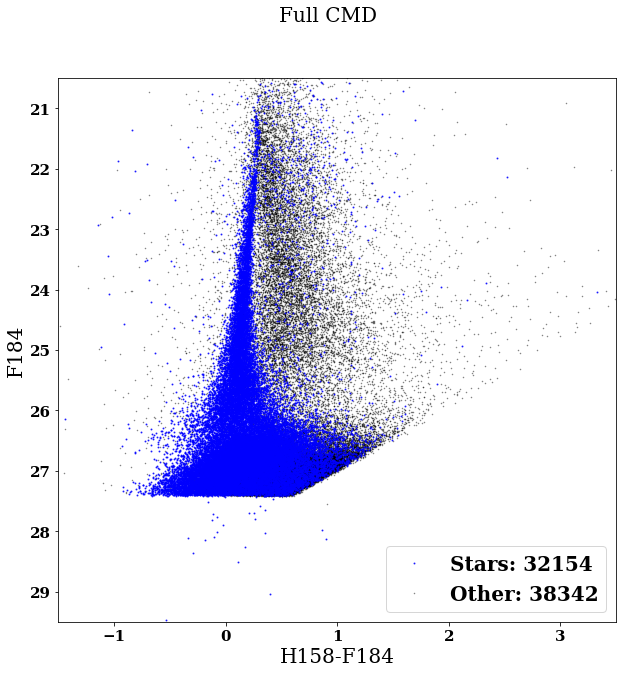

Stars: 14738  Others: 2903
			 Writing out:  clean_cmd_H158_F184_clean.png


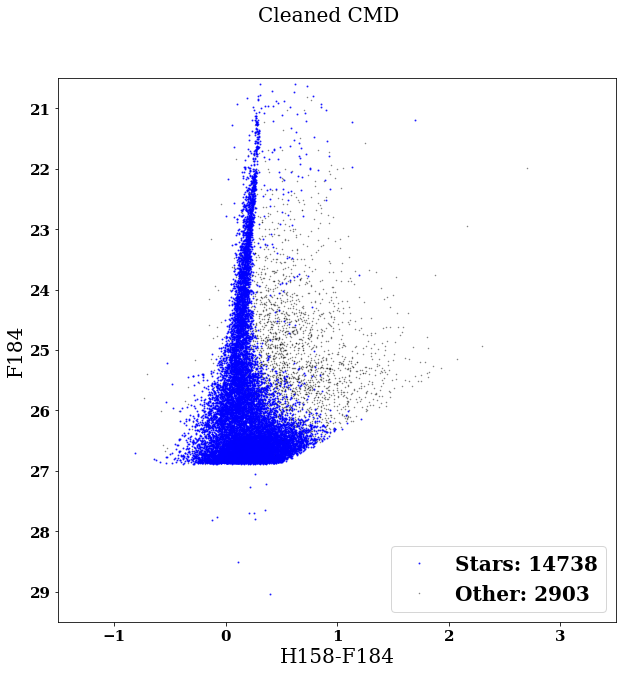

Recovery Rate:	 0.29
False Rate: 	 0.16







In [13]:
# Figures for all filter pairs
makePlots(in_DF,out_DF,new_labels,show_plot=True)